In [1]:
# importing required libraries

import keras
import tensorflow as tf
import random as rn
import numpy as np
import pandas as pd
import os
import glob
import datetime

In [2]:
# reading the data

df = pd.read_csv('index_nn_data.csv')
df.describe()

,Unnamed: 0,Bombay Stock Exchange: Index: 100,Bombay Stock Exchange: Index: SENSEX,Bombay Stock Exchange: Index: 200,Bombay Stock Exchange: Index: Dollex-200,Bombay Stock Exchange: Index: 500,Bombay Stock Exchange: Index: Information Technology,Bombay Stock Exchange: Index: Capital Goods,Bombay Stock Exchange: Index: Fast Moving Consumer Goods,Bombay Stock Exchange: Index: Consumer Durables,...,T Bills: Govt of India: State Governments: Total,T Bills: Govt of India: State Governments: Intermediate: 14 Days,T Bills: Govt of India: State Governments: Auction: 91 Days,T Bills: Govt of India: State Governments: Auction: 182 Days,T Bills: Govt of India: State Governments: Auction: 364 Days,T Bills: Govt of India: Others: Total,T Bills: Govt of India: Others: Intermediate: 14 Days,T Bills: Govt of India: Others: Auction: 91 Days,T Bills: Govt of India: Others: Auction: 182 Days,T Bills: Govt of India: Others: Auction: 364 Days
count,7362.000000,5015.000000,5014.000000,5014.000000,5002.000000,5013.000000,5014.000000,5013.000000,5013.000000,5013.000000,...,1.052000e+03,1.051000e+03,9.360000e+02,680.000000,775.000000,1.052000e+03,1050.000000,1.052000e+03,779.000000,1052.000000
mean,3680.500000,5237.786421,17112.776476,2153.854410,639.303187,6751.653633,6282.238951,9871.671125,4453.453228,6967.931879,...,9.383680e+05,5.907830e+05,3.048582e+05,72302.140015,40951.619587,6.489219e+05,7939.303563,2.691432e+05,128042.945655,251004.143061
std,2125.370674,3367.018542,10834.199992,1409.275491,335.856640,4433.630449,4195.565082,6274.366265,3630.215849,6865.771002,...,7.316525e+05,4.394474e+05,2.657297e+05,89750.828639,55357.315856,5.273016e+05,8041.655353,2.544456e+05,66909.877245,177188.701344
min,0.000000,705.490000,2600.120000,268.390000,93.070000,792.180000,853.650000,483.320000,707.460000,415.250000,...,4.480000e+03,4.480000e+03,1.000000e+03,40.000000,42.000000,4.496000e+03,20.000000,1.085000e+03,580.000000,2232.000000
25%,1840.250000,1981.735000,6251.635000,833.965000,317.777500,2619.120000,2805.612500,2846.890000,1130.340000,1504.450000,...,1.406400e+05,1.228050e+05,3.810250e+04,9810.250000,5300.000000,1.160650e+05,1850.000000,3.649750e+04,92003.387500,68805.000000
50%,3680.500000,5159.470000,16898.085000,2096.905000,693.805000,6603.750000,5229.850000,10598.380000,2808.970000,4713.970000,...,8.728250e+05,6.257738e+05,2.595800e+05,36750.000000,19570.000000,6.545550e+05,5277.900000,1.853450e+05,126862.050000,244565.000000
75%,5520.750000,7946.425000,25818.595000,3277.845000,889.620000,10271.520000,9976.795000,15154.700000,7548.430000,10134.570000,...,1.410418e+06,8.490050e+05,5.368901e+05,90959.200000,48060.000000,1.025768e+06,10368.375000,4.560236e+05,165364.817500,397265.630000
max,7361.000000,12455.780000,41952.630000,5184.800000,1275.160000,16062.950000,16469.980000,20905.870000,12771.690000,27706.350000,...,2.808028e+06,2.153948e+06,1.102014e+06,357282.060000,223690.520000,2.705386e+06,46000.000000,1.066994e+06,336186.830000,675727.860000


In [4]:
# Cleaning the Data

In [5]:
# dropping unnecessary columns
df.drop(['Unnamed: 0'], inplace=True, axis=1) 
# formatting the date and sorting by date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['date'])

In [6]:
# dropping dates that correspond to weekends, since the Indian stock market does not trade on these days
df = df[(df['date'].dt.dayofweek !=5)&(df['date'].dt.dayofweek != 6)]
# dealing with missing values
# a. columns with more than 10% of their values missing are dropped
df = df.loc[:, df.isna().sum()/df.shape[0] <= 0.1]
df = df.dropna(axis=0, how='all', subset=df.columns[1:]) # dropping rows with all values missing
# b. for the remaining columns, missing values are replaced using linear interpolation
date = df['date']
df = df[df.columns[1:]].astype(float).interpolate(method='linear', axis=0, limit=30, limit_direction='forward')
df['date'] = date
df = df.sort_values(['date']) # sorting by date
df

,Bombay Stock Exchange: Index: 100,Bombay Stock Exchange: Index: SENSEX,Bombay Stock Exchange: Index: 200,Bombay Stock Exchange: Index: Dollex-200,Bombay Stock Exchange: Index: 500,Bombay Stock Exchange: Index: Information Technology,Bombay Stock Exchange: Index: Capital Goods,Bombay Stock Exchange: Index: Fast Moving Consumer Goods,Bombay Stock Exchange: Index: Consumer Durables,Bombay Stock Exchange: Index: Health Care,...,National Stock Exchange: PE Ratio: Nifty 50,National Stock Exchange: PB Ratio: Nifty 50,National Stock Exchange: Dividend Yield: Nifty 50,National Stock Exchange: Turnover: Value,National Stock Exchange: Turnover: Volume,National Stock Exchange: Turnover: Trade: Advance,National Stock Exchange: Turnover: Trade: Decline,National Stock Exchange: Trade,National Stock Exchange: Market Capitalization: Total,date
2,1636.49,5375.110,635.040,243.170,1920.08,4260.200,1196.460,1172.500,1526.330,2246.260,...,25.91,4.630,0.950,17533.50,76.0830,1020.0,142.0,267038.0,9121240.0,2000-01-03
3,1690.67,5491.010,652.910,249.890,1972.29,4554.080,1179.470,1138.740,1517.650,2285.990,...,26.67,4.760,0.920,42680.20,106.7340,464.0,747.0,445618.0,9369010.0,2000-01-04
4,1643.14,5357.000,636.890,243.650,1922.87,4342.290,1145.400,1116.220,1470.100,2194.350,...,25.97,4.640,0.950,71379.80,146.8360,387.0,790.0,651968.0,9186620.0,2000-01-05
5,1644.78,5421.530,636.960,243.680,1923.36,4160.100,1174.280,1168.770,1531.150,2183.910,...,26.32,4.700,0.940,53708.60,124.5140,631.0,511.0,529011.0,9221700.0,2000-01-06
6,1606.46,5414.480,620.910,237.590,1871.82,3828.790,1138.470,1207.370,1497.400,2114.890,...,26.25,4.690,0.940,32486.10,101.0470,317.0,795.0,372075.0,9022490.0,2000-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,12194.91,41170.120,5093.300,1183.530,15787.45,16346.380,16654.350,11496.050,27517.600,14535.100,...,27.50,3.400,1.260,439231.00,2553.1750,929.0,906.0,13907421.0,157115978.4,2020-02-20
7356,12067.99,40766.675,5041.385,1169.875,15628.37,16261.395,16514.295,11402.365,27195.995,14370.415,...,27.21,3.365,1.275,415154.95,2385.5965,703.5,1144.0,13650898.5,155524970.8,2020-02-21
7359,11941.07,40363.230,4989.470,1156.220,15469.29,16176.410,16374.240,11308.680,26874.390,14205.730,...,26.92,3.330,1.290,391078.90,2218.0180,478.0,1382.0,13394376.0,153933963.2,2020-02-24
7360,11903.01,40281.200,4972.740,1151.860,15418.71,16270.520,16262.280,11306.250,26572.200,14037.950,...,26.85,3.320,1.290,368710.70,2024.8100,683.0,1153.0,12330735.0,153410437.1,2020-02-25


In [7]:
# Making the Data Stationary

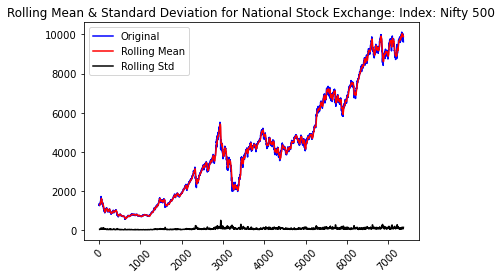

Results of the Dickey-Fuller Test
Test Statistic                    0.078353
p-value                           0.964552
Number of Lags Used              13.000000
Number of Observations Used    5244.000000
Critical Value (1%)              -3.431598
Critical Value (5%)              -2.862091
Critical Value (10%)             -2.567063
dtype: float64


In [8]:
# testing stationarity 

import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.x13
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf

# a. stationarity test function (source: https://github.com/tklouie/PyData_LA_2018/blob/master/PyData_LA_2018_Tutorial.ipynb)

def test_stationarity(df, ts):
    # determining rolling statistics
    rolmean = df[ts].rolling(window=12, center=False).mean()
    rolstd = df[ts].rolling(window=12, center=False).std()
    # plotting rolling statistics
    orig = plt.plot(df[ts], color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation=45)
    plt.show(block=False)
    plt.close()
    
    # performing the Dickey-Fuller test of stationarity (null hypothesis: the time series is not stationary)
    print('Results of the Dickey-Fuller Test')
    dftest = statsmodels.tsa.stattools.adfuller(df[ts], autolag='AIC')
    dftest
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

# b. calling the function on our time series
test_stationarity(df, 'National Stock Exchange: Index: Nifty 500')

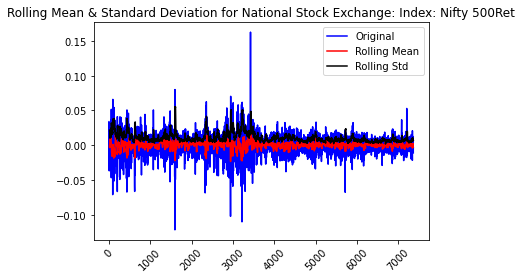

Results of the Dickey-Fuller Test
Test Statistic                -1.741829e+01
p-value                        4.842084e-30
Number of Lags Used            1.300000e+01
Number of Observations Used    5.243000e+03
Critical Value (1%)           -3.431598e+00
Critical Value (5%)           -2.862091e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


In [9]:
# converting data into a stationary time series
# to do this, we take the percentage change our level dependent variable, and calculate the first difference in the percentage changes

def percentChange(x, numLags):
    ''' 
    INPUTS:
    x: column for which we want to calculate the percentage change
    numLags: the number of days from when the change is to be computed. numLags takes a value depending on the time period over which the change is to be calculated.
    numLags = 1 for daily change
    numLags = 30 for monthly change
    numLags = 365 for yearly change
        
    OUTPUT:
    percentage change in the passed variable
    '''
    y = (x-x.shift(numLags))/x.shift(numLags)
    return y

dataForMl = pd.DataFrame()
dataForMl['date'] = df['date']

levelVariables = df.columns[:-1] # since all variables are level variables, there is no need to separate them in order to calculate the percentage change and then take the first difference
for lv in levelVariables:
    dataForMl[f'{lv}Ret'] = percentChange(df[lv], 1) # since we want daily percentage change in prices
dataForMl = dataForMl[1:]

# testing the differenced time series for stationarity
test_stationarity(dataForMl, 'National Stock Exchange: Index: Nifty 500Ret')

In [10]:
# Lagging the Data

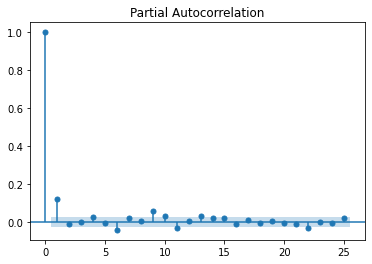

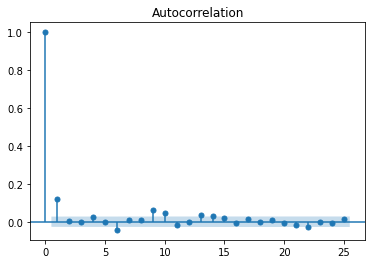

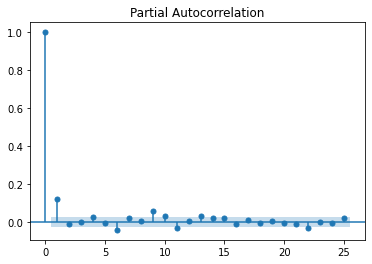

In [11]:
# making acf and pacf plots
tsaplots.plot_acf(dataForMl['National Stock Exchange: Index: Nifty 500Ret'].astype(float), lags=25)
tsaplots.plot_pacf(dataForMl['National Stock Exchange: Index: Nifty 500Ret'].astype(float), lags=25)

In [12]:
# selecting and creating the number of lags
minLagNum = 1
maxLagNum = 10 # decided heuristically
dataForMl = dataForMl.sort_values(['date'])
for column in dataForMl.columns:
    for lag in range(minLagNum, maxLagNum+1):
        dataForMl[f'{column}Lag_{lag}'] = dataForMl[f'{column}'].shift(lag)
dataForMl.head(5)

,date,Bombay Stock Exchange: Index: 100Ret,Bombay Stock Exchange: Index: SENSEXRet,Bombay Stock Exchange: Index: 200Ret,Bombay Stock Exchange: Index: Dollex-200Ret,Bombay Stock Exchange: Index: 500Ret,Bombay Stock Exchange: Index: Information TechnologyRet,Bombay Stock Exchange: Index: Capital GoodsRet,Bombay Stock Exchange: Index: Fast Moving Consumer GoodsRet,Bombay Stock Exchange: Index: Consumer DurablesRet,...,National Stock Exchange: Market Capitalization: TotalRetLag_1,National Stock Exchange: Market Capitalization: TotalRetLag_2,National Stock Exchange: Market Capitalization: TotalRetLag_3,National Stock Exchange: Market Capitalization: TotalRetLag_4,National Stock Exchange: Market Capitalization: TotalRetLag_5,National Stock Exchange: Market Capitalization: TotalRetLag_6,National Stock Exchange: Market Capitalization: TotalRetLag_7,National Stock Exchange: Market Capitalization: TotalRetLag_8,National Stock Exchange: Market Capitalization: TotalRetLag_9,National Stock Exchange: Market Capitalization: TotalRetLag_10
3,2000-01-04,0.033107,0.021562,0.028140,0.027635,0.027192,0.068983,-0.014200,-0.028793,-0.005687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,-0.028113,-0.024405,-0.024536,-0.024971,-0.025057,-0.046506,-0.028886,-0.019776,-0.031331,...,0.027164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-01-06,0.000998,0.012046,0.000110,0.000123,0.000255,-0.041957,0.025214,0.047079,0.041528,...,-0.019467,0.027164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000-01-07,-0.023298,-0.001300,-0.025198,-0.024992,-0.026797,-0.079640,-0.030495,0.033026,-0.022042,...,0.003819,-0.019467,0.027164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000-01-10,0.012219,0.019191,0.015332,0.038722,0.015290,0.014830,0.022319,0.039847,0.033632,...,-0.021602,0.003819,-0.019467,0.027164,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Preparing Final Dataset

In [14]:
dataForMl = dataForMl.sort_values(['date'])
dataForMl = dataForMl.dropna()

# include only columns with the lagged values while excluding the columns with lagged dates
finalVars = [col for col in dataForMl.columns if (col.find('Lag')!=-1)&(col.find('date')==-1)]
depVar = 'National Stock Exchange: Index: Nifty 500Ret'
finalVars.append(depVar)

# making a copy of the data for reference
dataForMl_copy = dataForMl

dataForMl = dataForMl[finalVars]

In [15]:
# Splitting the Data into Training, Validation, and Testing Sets

In [16]:
# options:
# a. cross-validation (bootstrap sampling for cross-sectional methods): not suited for time-series data
# b. fixed window (training, validation, and testing periods demarcated by dates)
# c. rolling window (shifting a window of fixed size ahead by one observation successively)/expanding window (increasing the window size by one successively)

In [17]:
# fixed window approach
test_percent = 0.10
num_test = int(np.round(test_percent*len(dataForMl)))
training = dataForMl[:-num_test]
testing = dataForMl[-num_test:]
validation_percent = 0.70
num_validation = int(np.round(validation_percent*len(testing)))
validation = testing[:-num_validation]
outOfSample = testing[-num_validation:]

In [18]:
# Normalizing the Data

In [19]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
# fitting and transforming training data, and simply transforming the other sets to avoid a look-forward bias or data leakage
trainingNormal = normalizer.fit_transform(training.values)
validationNormal = normalizer.transform(validation.values)
outOfSampleNormal = normalizer.transform(outOfSample.values)

In [20]:
# Rescaling the Normalized Data

In [21]:
# scaling the data to be between -1 and 1, since it's appropriate for data being input into a CNN/LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
# fitting and transforming training data, and simply transforming the other sets to avoid a look-forward bias or data leakage
trainingMinMax = min_max_scaler.fit_transform(trainingNormal)
validationMinMax = min_max_scaler.transform(validationNormal)
outOfSampleMinMax = min_max_scaler.transform(outOfSampleNormal)

In [22]:
# Splitting the Data into Independent and Dependent Variables

trainingMinMax_X, trainingMinMax_y = trainingMinMax[:, :-1], trainingMinMax[:, -1]
validationMinMax_X, validationMinMax_y = validationMinMax[:, :-1], validationMinMax[:, -1]
outOfSampleMinMax_X, outOfSampleMinMax_y = outOfSampleMinMax[:, :-1], outOfSampleMinMax[:, -1]

In [23]:
# Time Series Forecasting

In [24]:
# Potential Solution 1: SARIMA Model (acts as a benchmark for MSE)

In [25]:
import statsmodels.api as sm

# trend orders, determined using ACF (q), PACF (p), and tests for stationarity (d)
p = 1 # the trend autoregressive order (lag value at which PACF chart crosses the upper confidence interval for the first time)
d = 0 # the trend difference order
q = 1 # the trend moving average order (lag value at which ACF chart crosses the upper confidence interval for the first time)

# seasonal orders - experimenting
P = 1 # the number of seasonal autoregressive terms
D = 0 # the number of seasonal difference terms
Q = 1 # the number of seasonal moving average terms
M = 2 # the number of time steps for a seasonal period (the number of periods in a season)

myOrder = (p, d, q)
mySeasonalOrder = (P, D, Q, M)
model1 = sm.tsa.statespace.SARIMAX(trainingMinMax_y, order=myOrder, seasonal_order=mySeasonalOrder, trends='c')
# to include exogenous variables, normalize, scale and split a similar list of variables

# training the model
model1_fit = model1.fit()
# making predictions
model1_pred = model1_fit.predict(start=1, end=len(testing))


In [26]:
# defining a function to plot the results
from sklearn.metrics import mean_squared_error
def plot_results(actual_y, predicted_y, method, date):
    mse = mean_squared_error(actual_y, predicted_y)
    plt.figure(figsize=(16, 4))
    plt.plot(date, actual_y)
    plt.plot(date, predicted_y)
    plt.legend(['Actual', 'Predicted'])
    plt.title(f'{method} (MSE: {mse})')
    plt.show()

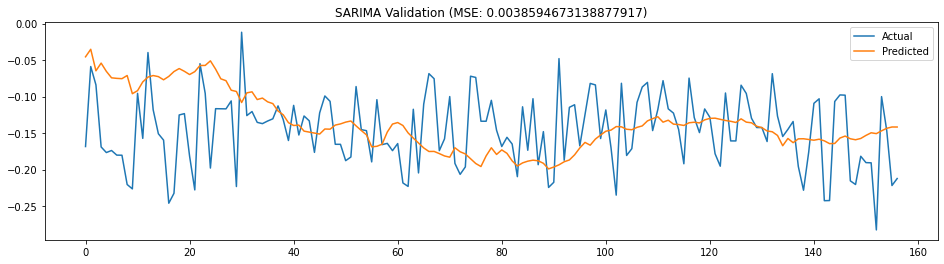

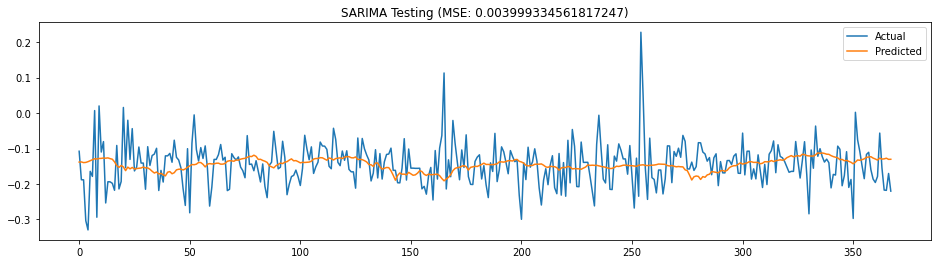

In [27]:
# plotting the SARIMA results
plot_results(validationMinMax_y, model1_pred[:len(validationMinMax_y)], 'SARIMA Validation', range(len(validationMinMax_y)))
plot_results(outOfSampleMinMax_y, model1_pred[len(validationMinMax_y):], 'SARIMA Testing', range(len(outOfSampleMinMax_y)))

In [28]:
# Potential Solution 2: Deep Neural Networks (DNNs)

In [29]:
# CNNs and LSTMs preserve the temporal structure of data

from numpy import array

# we split a multivariate sequence into samples that preserve the temporal structure of the data (source: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting)

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond dataset
        if out_end_ix > len(sequences):
            break
        # divide into input and output parts of the pattern
        seq_X, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_X)
        y.append(seq_y)
    return array(X), array(y)

In [30]:
# Defining training, validation, and out of sample sequences

n_steps_in = 30 # number of observations from the past that we assume to be relevant across time for forecasting
n_steps_out = 1 # number of units ahead that we want to forecast into the future

trainingSeq_X, trainingSeq_y = split_sequences(trainingMinMax, n_steps_in, n_steps_out)
validationSeq_X, validationSeq_y = split_sequences(validationMinMax, n_steps_in, n_steps_out)
outOfSampleSeq_X, outOfSampleSeq_y = split_sequences(outOfSampleMinMax, n_steps_in, n_steps_out)

In [31]:
# The difference between the training sets in linear methods and neural networks

In [32]:
trainingMinMax.shape # (rows, columns)

(4722, 601)

In [33]:
trainingSeq_X.shape # (number of samples, size of 'window'/timesteps, number of independent variables)

(4693, 30, 600)

In [34]:
# 2.1: Convolutional Neural Network (CNN)

In [35]:
# importing necessary libraries to implement a neural network in Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2, l1_l2

In [36]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # For Replicability: Always run this as one cell # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# starting Numpy-generated random numbers in a well-defined initial state
np.random.seed(42) 

# starting core Python-generated random numbers in a well-defined state
rn.seed(12345)

# force TensorFlow to use single thread. multiple threads are a potential source of non-reproducible results. for further details, see https://stackoverflow.com/questions/42022950
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

# making a random number generation in the TensorFlow backend have a well-defined initial state. for further details, see https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.random.set_seed(1234)

# from keras, import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# patience: how many times we want the validation error to keep increasing with every passing epoch before we stop training the neural network
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto', restore_best_weights=True)
# number of times the feed forward mechanism and back propagation are repeated (how many trial and error-type procedures)
epochs = 100000
# batch size for SGD (Stochastic Gradient Descent): number of samples used in one go
bs = 100
# learning rate: degree to which weights are updated by each batch of SGD
lr = 0

sgd = SGD(learning_rate=lr) # a type of optimizer. alternatives: Adam, Nadam

X, y = split_sequences(trainingMinMax, n_steps_in, n_steps_out)
n_features = X.shape[2]

np.random.seed(0)

# initializing keras sequential model
model2 = Sequential()

# convolutional layer starts
model2.add(Conv1D(filters=5, kernel_size=2, strides=2, activation='linear', input_shape=(n_steps_in, n_features))) # number of filters, size of the filter across time, number of rows the filter moves ahead by, transformation, shape of 1 sample: preserves temporal structure. kernel_regularizer=l2(0.009),, bias_regularizer=l2(0.01) : reduce weights, bias that are causing overfitting. activity_regularizer: reduces y for the same
# convolutional layer ends

# sub-sampling layer: removes the noise from feature maps created in the convolutional layer. a pool size of 1, however, does not reduce any noise in the data. we set this since removing noise did not improve the quality of our forecast 
model2.add(MaxPooling1D(pool_size=1)) # alternative: AveragePooling1D

# model.add(BatchNormalization())
model2.add(Dropout(0.1)) # reduces overfitting by dropping some weights randomly

# now, we use the feature maps created using the convolutional layer to run a linear regression

# regression layer begins
model2.add(Flatten())
model2.add(Dense(1, activation='tanh', kernel_regularizer=l2(0.01))) # number of outputs, transformation: other options include ReLU, linear, sigmoid
model2.compile(loss='mean_squared_error', optimizer='sgd') # specifies loss function and optimizer to use

# training the model
model2.fit(trainingSeq_X, trainingSeq_y, batch_size=bs, epochs=epochs, callbacks=[EarlyStop], verbose=2, shuffle=False, validation_data=(validationSeq_X, validationSeq_y))

model2.summary()

Epoch 1/100000
47/47 - 14s - loss: 0.7603 - val_loss: 0.7513
Epoch 2/100000
47/47 - 1s - loss: 0.7638 - val_loss: 0.7509
Epoch 3/100000
47/47 - 1s - loss: 0.7634 - val_loss: 0.7505
Epoch 4/100000
47/47 - 0s - loss: 0.7630 - val_loss: 0.7501
Epoch 5/100000
47/47 - 0s - loss: 0.7626 - val_loss: 0.7498
Epoch 6/100000
47/47 - 1s - loss: 0.7621 - val_loss: 0.7493
Epoch 7/100000
47/47 - 1s - loss: 0.7615 - val_loss: 0.7487
Epoch 8/100000
47/47 - 1s - loss: 0.7504 - val_loss: 0.8517
Epoch 9/100000
47/47 - 1s - loss: 0.2008 - val_loss: 0.0269
Epoch 10/100000
47/47 - 1s - loss: 0.0422 - val_loss: 0.0222
Epoch 11/100000
47/47 - 1s - loss: 0.0367 - val_loss: 0.0199
Epoch 12/100000
47/47 - 1s - loss: 0.0345 - val_loss: 0.0191
Epoch 13/100000
47/47 - 1s - loss: 0.0330 - val_loss: 0.0182
Epoch 14/100000
47/47 - 1s - loss: 0.0314 - val_loss: 0.0175
Epoch 15/100000
47/47 - 1s - loss: 0.0305 - val_loss: 0.0169
Epoch 16/100000
47/47 - 1s - loss: 0.0297 - val_loss: 0.0164
Epoch 17/100000
47/47 - 1s - los

Epoch 135/100000
47/47 - 1s - loss: 0.0103 - val_loss: 0.0030
Epoch 136/100000
47/47 - 1s - loss: 0.0103 - val_loss: 0.0030
Epoch 137/100000
47/47 - 1s - loss: 0.0103 - val_loss: 0.0030
Epoch 138/100000
47/47 - 1s - loss: 0.0103 - val_loss: 0.0029
Epoch 139/100000
47/47 - 0s - loss: 0.0102 - val_loss: 0.0029
Epoch 140/100000
47/47 - 1s - loss: 0.0102 - val_loss: 0.0029
Epoch 141/100000
47/47 - 0s - loss: 0.0102 - val_loss: 0.0029
Epoch 142/100000
47/47 - 0s - loss: 0.0102 - val_loss: 0.0029
Epoch 143/100000
47/47 - 1s - loss: 0.0102 - val_loss: 0.0029
Epoch 144/100000
47/47 - 1s - loss: 0.0102 - val_loss: 0.0029
Epoch 145/100000
47/47 - 1s - loss: 0.0101 - val_loss: 0.0028
Epoch 146/100000
47/47 - 0s - loss: 0.0101 - val_loss: 0.0028
Epoch 147/100000
47/47 - 1s - loss: 0.0102 - val_loss: 0.0028
Epoch 148/100000
47/47 - 1s - loss: 0.0101 - val_loss: 0.0028
Epoch 149/100000
47/47 - 0s - loss: 0.0101 - val_loss: 0.0028
Epoch 150/100000
47/47 - 0s - loss: 0.0101 - val_loss: 0.0028
Epoch 15

47/47 - 0s - loss: 0.0097 - val_loss: 0.0023
Epoch 268/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 269/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 270/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 271/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 272/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 273/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 274/100000
47/47 - 1s - loss: 0.0096 - val_loss: 0.0023
Epoch 275/100000
47/47 - 1s - loss: 0.0096 - val_loss: 0.0023
Epoch 276/100000
47/47 - 1s - loss: 0.0096 - val_loss: 0.0023
Epoch 277/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 278/100000
47/47 - 0s - loss: 0.0097 - val_loss: 0.0023
Epoch 279/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 280/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 281/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 282/100000
47/47 - 1s - loss: 0.0097 - val_loss: 0.0023
Epoch 283/100000
47/47 - 

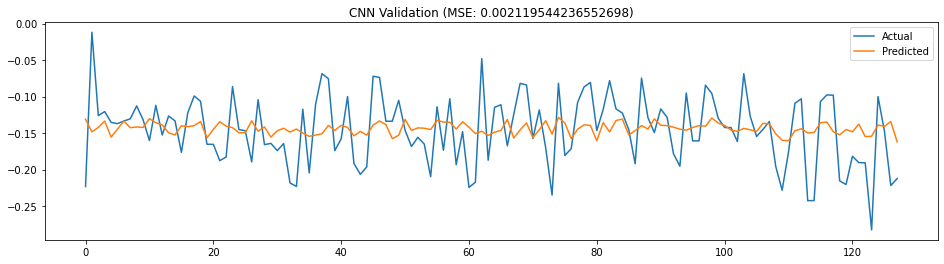

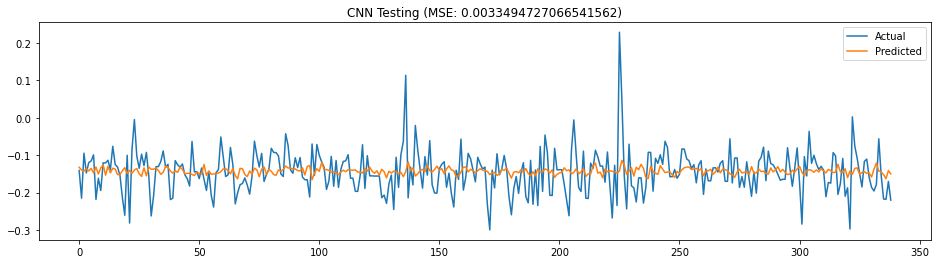

In [37]:
# validation metrics
cnnValidationPred = model2.predict(validationSeq_X)

# out of sample metrics
cnnOutOfSamplePred = model2.predict(outOfSampleSeq_X)

# plotting results of CNN estimation
plot_results(validationSeq_y, cnnValidationPred, 'CNN Validation', range(len(validationSeq_y)))
plot_results(outOfSampleSeq_y, cnnOutOfSamplePred, 'CNN Testing', range(len(outOfSampleSeq_y)))

In [38]:
# 2.2 Recurrent Neural Network (RNN): Long Short Term Memory Network (LSTM) 

In [39]:
# an advantage over CNNs: they also use the sequential nature of data in a time series. LSTMs are chosen over vanilla RNNs since they can learn from long sequences, while the latter may not.

In [40]:
from keras.layers import LSTM

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # For Replicability: Always run this as one cell # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

np.random.seed(42)
rn.seed(12345)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
tf.random.set_seed(1234)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto', restore_best_weights=True)
epochs = 100000
lr = 0
sgd = SGD(learning_rate=lr) # alternatives: adam = Adam(learning_rate=lr); nadam = Nadam(learning_rate=lr)
bs = 100
n_steps_in = 30
n_steps_out = 1

# training, validation, and out of sample sequences
trainingSeq_X, trainingSeq_y = split_sequences(trainingMinMax, n_steps_in, n_steps_out)
validationSeq_X, validationSeq_y = split_sequences(validationMinMax, n_steps_in, n_steps_out)
outOfSampleSeq_X, outOfSampleSeq_y = split_sequences(outOfSampleMinMax, n_steps_in, n_steps_out)

X, y = split_sequences(trainingMinMax, n_steps_in, n_steps_out)
n_features = X.shape[2]

np.random.seed(0); print(np.random.rand(4))

model3 = Sequential()
model3.add(LSTM(300, input_shape=(n_steps_in, n_features), activation='tanh')) # number of LSTM nodes: too many and starts predicting the mean like SARIMA, preserving temporal nature, transformation: best not to use any other type of transformation for LSTM, otherwise exploding gradient problem, very bad or no predictions
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='linear')) # regression layer; number of outputs (dimensionality), transformation
model3.compile(loss='mean_squared_error', optimizer='sgd')

model3.fit(trainingSeq_X, trainingSeq_y, batch_size=bs, epochs=epochs, callbacks=[EarlyStop], verbose=2, shuffle=False, validation_data=(validationSeq_X, validationSeq_y))

model3.summary()

[0.5488135  0.71518937 0.60276338 0.54488318]
Epoch 1/100000
47/47 - 12s - loss: 0.3093 - val_loss: 0.0033
Epoch 2/100000
47/47 - 8s - loss: 0.0275 - val_loss: 0.0028
Epoch 3/100000
47/47 - 9s - loss: 0.0273 - val_loss: 0.0025
Epoch 4/100000
47/47 - 9s - loss: 0.0245 - val_loss: 0.0036
Epoch 5/100000
47/47 - 10s - loss: 0.0237 - val_loss: 0.0031
Epoch 6/100000
47/47 - 9s - loss: 0.0220 - val_loss: 0.0026
Epoch 7/100000
47/47 - 9s - loss: 0.0219 - val_loss: 0.0031
Epoch 8/100000
47/47 - 9s - loss: 0.0210 - val_loss: 0.0024
Epoch 9/100000
47/47 - 9s - loss: 0.0198 - val_loss: 0.0024
Epoch 10/100000
47/47 - 9s - loss: 0.0196 - val_loss: 0.0026
Epoch 11/100000
47/47 - 9s - loss: 0.0190 - val_loss: 0.0026
Epoch 12/100000
47/47 - 9s - loss: 0.0185 - val_loss: 0.0026
Epoch 13/100000
47/47 - 9s - loss: 0.0179 - val_loss: 0.0025
Epoch 14/100000
47/47 - 9s - loss: 0.0178 - val_loss: 0.0024
Epoch 15/100000
47/47 - 9s - loss: 0.0167 - val_loss: 0.0023
Epoch 16/100000
47/47 - 9s - loss: 0.0164 - va

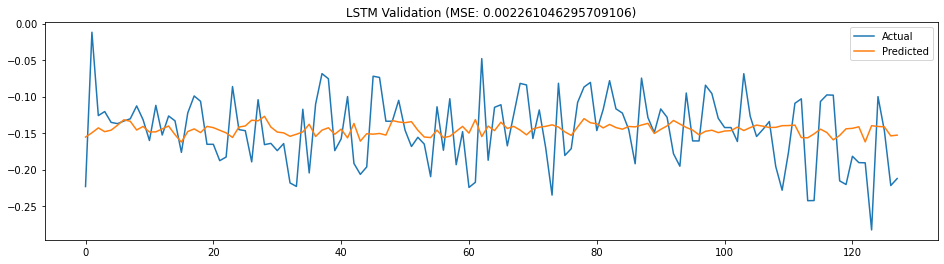

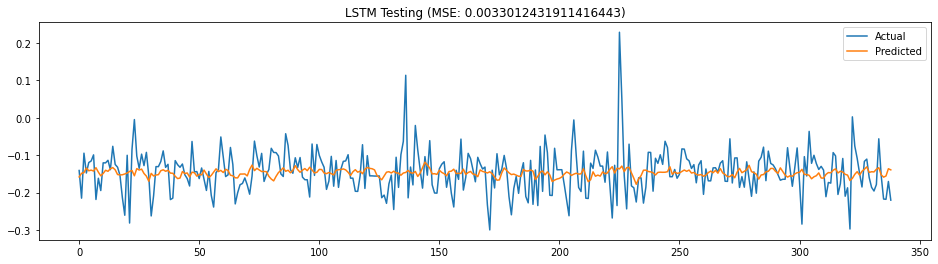

In [46]:
# validation metrics
lstmValidationPred = model3.predict(validationSeq_X)

# out of sample metrics
lstmOutOfSamplePred = model3.predict(outOfSampleSeq_X)

# plotting results
plot_results(validationSeq_y, lstmValidationPred, 'LSTM Validation', range(len(validationSeq_y)))
plot_results(outOfSampleSeq_y, lstmOutOfSamplePred, 'LSTM Testing', range(len(outOfSampleSeq_y)))

In [47]:
# Saving a Neural Network Model and Calling it Later

In [48]:
# create a directory for storing output
# dirName = f'C:\\grahithaa\\stockindex_nn\\outputs'
# try:
    # create target directory
#     os.mkdir(dirName)
#     print("Directory ", dirName, " created ")
# except FileExistsError:
#     print("Directory ", dirName, " already exists")
    
# change directory
# os.chdir(dirName)

# specify model name
# modelName = 'lstm'
# fileName = f'{modelName}_model.h5'
# model3.save(fileName)

# import keras

# modelName = 'lstm'
# fileName = f'{modelName}_model.h5'
# saved_model = keras.models.load_model(fileName)

# yhat = saved_model.predict(outOfSampleSeq_X)
# mse = mean_squared_error(outOfSampleSeq_y, cnnOutOfSamplePred)
# print(mse)
# mse1 = mean_squared_error(outOfSampleSeq_y, yhat)
# print(mse1)

In [49]:
# Inverting the Scaling (Presentation Purposes)

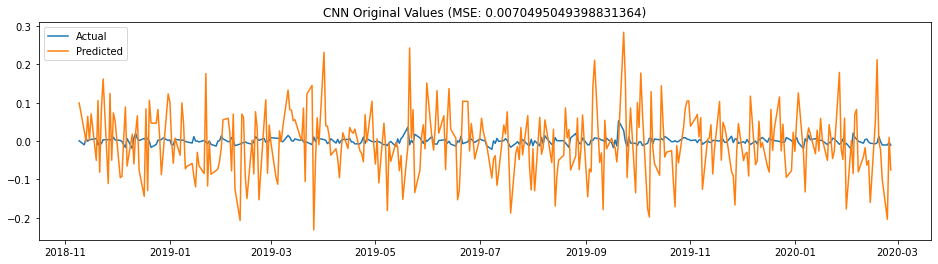

In [50]:
from numpy import concatenate
def invert_scaling(X_minmax, y_predicted, n_steps_in):
    reshaped_pred = y_predicted.reshape((y_predicted.shape[0],1))
    matrix = concatenate((X_minmax[n_steps_in-1:], reshaped_pred), axis=1)
    matrix_min_max_invert = min_max_scaler.inverse_transform(matrix)
    inv_pred = matrix_min_max_invert[:, -1]
    return inv_pred

inv_yhat = invert_scaling(outOfSampleMinMax_X, cnnOutOfSamplePred, n_steps_in)
plot_results(dataForMl_copy['National Stock Exchange: Index: Nifty 500Ret'][-(num_validation-n_steps_in+1):].values, inv_yhat, 'CNN Original Values', dataForMl_copy['date'][-(num_validation-n_steps_in+1):])